In [1]:
# import the necessary libraries and packages 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

import seaborn as sn

ModuleNotFoundError: No module named 'folium'

In [2]:
#check the given data

df = pd.read_csv('kc_house_data.csv')
df.head(10)

df.date = pd.to_datetime(df.date)
print('Number of records: '+str(len(df)))
display(df.head())
display(df.info())

Number of records: 21597


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

None

In [3]:
# check the column names

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# check the columns with NaN values

df_house.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
# check the mean values

df.mean()

id               4.580474e+09
price            5.402966e+05
bedrooms         3.373200e+00
bathrooms        2.115826e+00
sqft_living      2.080322e+03
sqft_lot         1.509941e+04
floors           1.494096e+00
waterfront       7.595859e-03
view             2.338627e-01
condition        3.409825e+00
grade            7.657915e+00
sqft_above       1.788597e+03
yr_built         1.971000e+03
yr_renovated     8.363678e+01
zipcode          9.807795e+04
lat              4.756009e+01
long            -1.222140e+02
sqft_living15    1.986620e+03
sqft_lot15       1.275828e+04
dtype: float64

In [36]:
# check the values of each column

df.describe().round()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,7.000000e+03,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,6192.0,6977.0,7000.0,7000.0,7000.0,7000.0,5768.0,7000.0,7000.0,7000.0,7000.0,7000.0
mean,4.618286e+09,536597.0,3.0,2.0,2065.0,15832.0,1.0,0.0,0.0,3.0,8.0,1760.0,1967.0,91.0,98078.0,48.0,-122.0,1982.0,13192.0
std,2.865228e+09,373410.0,1.0,1.0,910.0,43353.0,1.0,0.0,1.0,1.0,1.0,814.0,28.0,417.0,54.0,0.0,0.0,675.0,25513.0
min,1.000102e+06,80000.0,1.0,0.0,380.0,572.0,1.0,0.0,0.0,1.0,3.0,380.0,1900.0,0.0,98001.0,47.0,-123.0,620.0,660.0
25%,2.172001e+09,316500.0,3.0,2.0,1420.0,5410.0,1.0,0.0,0.0,3.0,7.0,1190.0,1950.0,0.0,98033.0,47.0,-122.0,1490.0,5410.0
50%,3.971701e+09,450000.0,3.0,2.0,1905.0,7903.0,1.0,0.0,0.0,3.0,7.0,1540.0,1969.0,0.0,98065.0,48.0,-122.0,1840.0,7854.0
75%,7.335400e+09,648606.0,4.0,2.0,2510.0,11134.0,2.0,0.0,0.0,4.0,8.0,2150.0,1990.0,0.0,98118.0,48.0,-122.0,2350.0,10400.0
max,9.842300e+09,7060000.0,9.0,7.0,10040.0,1651359.0,3.0,1.0,4.0,5.0,13.0,7680.0,2015.0,2015.0,98199.0,48.0,-121.0,5790.0,434728.0


In [58]:
# find the price quintile

df['price'].quantile(0.75)

648606.25

In [64]:
df.price >= price75  #condition

0       False
1       False
2       False
3       False
4       False
5        True
6       False
7       False
8       False
9       False
10       True
11      False
12      False
13      False
14      False
15       True
16      False
17      False
18      False
19      False
20      False
21       True
22      False
23      False
24      False
25      False
26       True
27       True
28      False
29       True
        ...  
6970    False
6971     True
6972    False
6973     True
6974    False
6975    False
6976     True
6977     True
6978     True
6979    False
6980    False
6981    False
6982    False
6983    False
6984    False
6985     True
6986    False
6987    False
6988    False
6989    False
6990    False
6991    False
6992    False
6993    False
6994    False
6995     True
6996    False
6997    False
6998    False
6999     True
Name: price, Length: 7000, dtype: bool

In [61]:
# top 75%

price75= df['price'].quantile(0.75)
type(price75)

float

In [69]:
# make a dataframe with the quantile

expensive = df[(df['price'] >= price75)]
# expensive_df = df[(df['price'] >= price75) & (df['waterfront'] == 1)]
expensive.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
15,9297300055,1/24/2015,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,...,9,1980,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000
21,2524049179,8/26/2014,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,9,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336
26,1794500383,6/26/2014,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,...,8,1750,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573


In [ ]:
# make a map with house prices > 75%

expensive_map = folium.Map(location=[47.6561, -122.005],
                        zoom_start=13,
                        tiles='CartoDB dark_matter')

#folium.CircleMarker(location=[47.6561, -122.005], color = 'teal', fill=True).add_to(expensive_map)

for i in expensive.index:
    lat = expensive.lat[i]
    long = expensive.long[i]
    marker = folium.Marker([lat, long]).add_to(expensive_map)

expensive_map


In [88]:
# low 25% and put in a dataframe

price25 = df['price'].quantile(0.25)

cheap = df[(df['price'] <= price75)]
cheap.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [85]:
waterfront = df[(df['waterfront'] == 1)]

waterfront_map = folium.Map(location=[47.6561, -122.005],
                        zoom_start=13,
                        tiles='openstreetmap')

#folium.CircleMarker(location=[47.6561, -122.005], color = 'teal', fill=True).add_to(waterfront_map)

for i in waterfront.index:
    lat = waterfront.lat[i]
    long = waterfront.long[i]
    marker = folium.Marker([lat, long]).add_to(waterfront_map)

waterfront_map


In [35]:
# make a cluster map with 7 000 houses
# bigger number of houses makes the map slower...like really slow

df = pd.read_csv('kc_house_data.csv')
df = df.head(7000)

# "define" the latitude and longitude
lat=float(np.sum(df.lat.tolist())/len(df.lat))
long=float(np.sum(df.long.tolist())/len(df.long))

# make a basic map
house_map = folium.Map(location=[lat, long], zoom_start=6,tiles='Stamen Terrain')

# make cluster markers using folium plugins
marker_cluster = folium.plugins.MarkerCluster().add_to(house_map)

for i in df.index:
    lat = df.lat[i]
    long = df.long[i]
    marker = folium.Marker([lat, long]).add_to(marker_cluster)

# call the map    
house_map

In [92]:
# make a heat map of the house sales

df = pd.read_csv('kc_house_data.csv')
#df = df.head(10000)   was running the map by addig every time a bit more

# "define" the latitude and longitude
lat=float(np.sum(df.lat.tolist())/len(df.lat))
long=float(np.sum(df.long.tolist())/len(df.long))

# make a basic map
house_map = folium.Map(location=[lat, long], zoom_start=12,tiles='Stamen Terrain')

#
heat_df = df[['lat', 'long']]
heat_df = heat_df.dropna(axis=0, subset=['lat','long'])
heat_data = [[row['lat'],row['long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius = 15).add_to(house_map)
        #min_opacity = 0.1, max_val = 50,
        #gradient={.3: 'blue', .6: 'green', 1: 'red'}

house_map

In [76]:
# make a heat map of the expensive houses

expensive = df[(df['price'] >= price75)]
# expensive_df = df[(df['price'] >= price75) & (df['waterfront'] == 1)]

# "define" the latitude and longitude
lat=float(np.sum(expensive.lat.tolist())/len(expensive.lat))
long=float(np.sum(expensive.long.tolist())/len(expensive.long))

# make a basic map
expensive_map = folium.Map(location=[lat, long], zoom_start=10,tiles='Stamen Terrain')

#
heat_df = expensive[['lat', 'long']]
heat_df = heat_df.dropna(axis=0, subset=['lat','long'])
heat_data = [[row['lat'],row['long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius = 15).add_to(expensive_map)
        #min_opacity = 0.1, max_val = 50,
        #gradient={.3: 'blue', .6: 'green', 1: 'red'}

expensive_map

In [89]:
# make a heat map of the cheap houses

cheap = df[(df['price'] <= price25)]

# define the latitude and longitude
lat=float(np.sum(cheap.lat.tolist())/len(cheap.lat))
long=float(np.sum(cheap.long.tolist())/len(cheap.long))

# make a basic map
cheap_map = folium.Map(location=[lat, long], zoom_start=10,tiles='Stamen Terrain')

#
heat_df = cheap[['lat', 'long']]
heat_df = heat_df.dropna(axis=0, subset=['lat','long'])
heat_data = [[row['lat'],row['long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius = 15).add_to(cheap_map)
        #min_opacity = 0.1, max_val = 50,
        #gradient={.3: 'blue', .6: 'green', 1: 'red'}

cheap_map

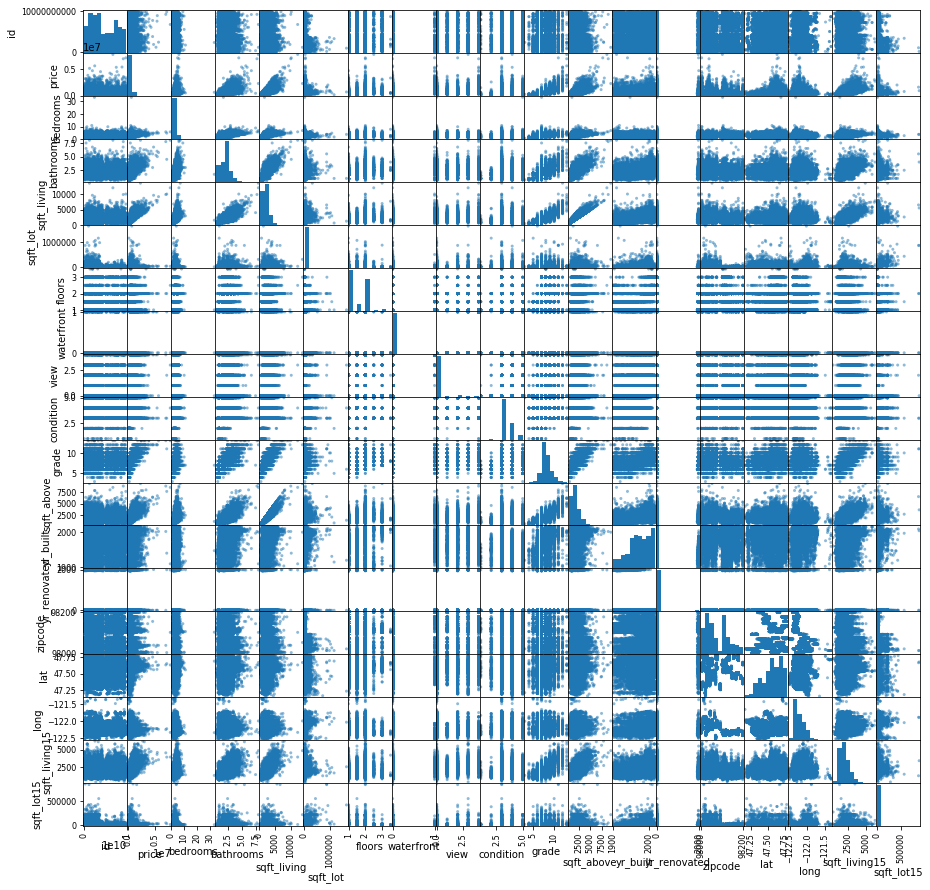

In [96]:
# plot scatter matrix

pd.plotting.scatter_matrix(df, figsize=(15,15))
plt.show()

# Look at the houses by year of built

In [ ]:
# how many houses was built when
# average price by year of built

In [40]:
df_house['yr_built'].value_counts().sort_index(ascending=False)

2015     38
2014    559
2013    201
2012    170
2011    130
2010    143
2009    230
2008    367
2007    417
2006    453
2005    450
2004    433
2003    420
2002    222
2001    305
2000    218
1999    263
1998    239
1997    177
1996    194
1995    169
1994    249
1993    202
1992    198
1991    224
1990    317
1989    290
1988    270
1987    294
1986    215
       ... 
1929    114
1928    126
1927    115
1926    180
1925    165
1924    139
1923     84
1922     95
1921     76
1920     98
1919     88
1918    120
1917     56
1916     79
1915     64
1914     54
1913     58
1912     79
1911     73
1910    134
1909     94
1908     86
1907     65
1906     92
1905     74
1904     45
1903     46
1902     27
1901     29
1900     87
Name: yr_built, Length: 116, dtype: int64

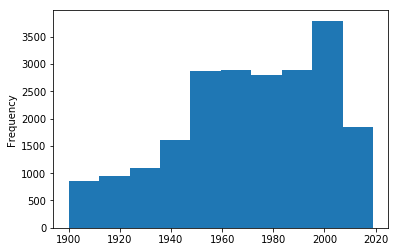

In [94]:
df['yr_built'].plot.hist(range=(1900, 2019), bins=10)
plt.show()

In [101]:
# make new column for year_built in 3 columns
# 1 between 1900 and 1940
# 2 between 1940 and 1980
# 3 after 1980

df['year_bins'] = df.yr_built.map(lambda x: 1 if x >= 1900 and x <= 1940
                            else (2 if x > 1940 and x <= 1980
                                 else 3))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_bins
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,3


In [ ]:
df

# Look at house sales by date
